<a href="https://colab.research.google.com/github/Shreyas-13/Tensorflow-Developer/blob/main/02_NeuralNetwork__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification

Types of classifications:
  * Binary Classification
  * Multi-class Classification
  * Multi-label Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

## Make 1000 samples
n_samples = 1000

## Create Circles
X, y = make_circles(n_samples, noise=.03, random_state=42)

In [2]:
## Features and Labels
print('Features-', X[:10])
print('Target-', y[:10])

Features- [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
Target- [1 1 1 1 0 1 1 1 1 0]


In [3]:
import pandas as pd

df = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'Y':y})
df.head()

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


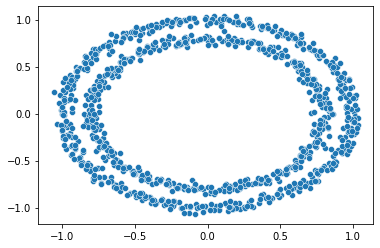

In [4]:
## Visulaize
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="darkgrid", palette="deep")

sns.scatterplot(X[:, 0], X[:, 1], cmap='RdYlBu')

In [5]:
## Shape of data

print('Features Shape-', X.shape, '\nTarget Shape-', y.shape)

Features Shape- (1000, 2) 
Target Shape- (1000,)


### Steps in modelling

1. Create or import a model
2. Compile
3. Fit
4. Evaluate
5. Tweak
6. Repeat

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(df[['X0', 'X1']],
                                                    df[['Y']], 
                                                    test_size=.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = tf.keras.Sequential([
                            #  tf.keras.Input(shape=X_train.shape),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

(800, 2) (200, 2) (800, 1) (200, 1)


In [7]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 1.0000


[0.29140326380729675, 1.0]

### Visualizing model prediction

Create a function `plot_decision_boundary()`:
* Take trained model feature (X) and label (y).
* Create a meshgrid of different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as the lines between zones (where each unique class falls)

***Note - Used ```mlxtend.plotting``` to plot the decision boundary***

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


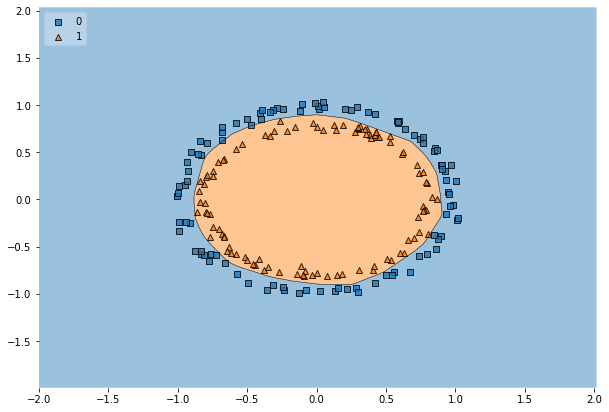

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,7))

plot_decision_regions(X_test.to_numpy(), y_test.to_numpy().ravel(), clf=model,
                      legend=2)

### Make Moons

In [9]:
from sklearn.datasets import make_moons

n_samples = 3000

X, y = make_moons(n_samples, noise=.1, random_state=42)

print(X[:10], y[:10])

[[ 0.06109728 -0.14774355]
 [-0.89271911  0.57291225]
 [ 0.34345014 -0.15428805]
 [ 0.82703518  0.50047614]
 [ 1.46968705 -0.36676552]
 [-0.64219452  0.80624398]
 [-0.88271967  0.38907118]
 [ 0.7747464  -0.23591078]
 [ 0.5785075   0.96375404]
 [ 1.59893412 -0.29908906]] [1 0 1 0 1 0 0 1 0 1]


In [10]:
import pandas as pd

## Converting to dataframe
df2 = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'y':y})
df2.head()

,X0,X1,y
0,0.061097,-0.147744,1
1,-0.892719,0.572912,0
2,0.343450,-0.154288,1
3,0.827035,0.500476,0
4,1.469687,-0.366766,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


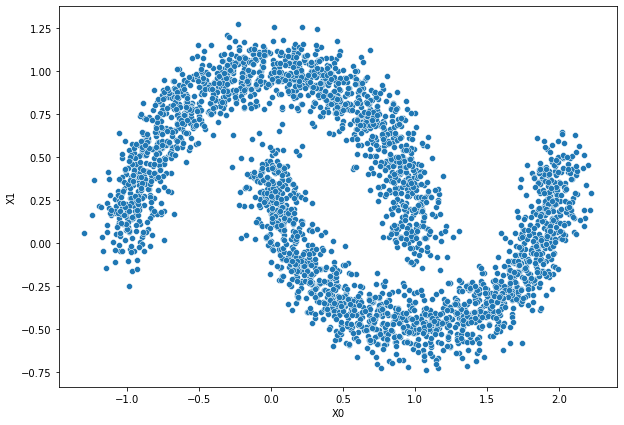

In [11]:
## Visualizing the data
plt.figure(figsize=(10,7))

sns.scatterplot(df2['X0'], df2['X1'])

### Defining a Callback

Callback functions are defined to stop the training if the evaluation metric has already been achieved and hence there is no need to train the data any further.

Callback functions can also be used to find the best possible learning rate.

In [12]:
class metricCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.99):
      print('Stop Training. Accuracy achieved 99%')
      self.model.stop_training = True

obj = metricCallback()

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(df2[['X0', 'X1']], df2['y'],
                                                    random_state=42)

model2 = tf.keras.Sequential([
                              # tf.keras.Input(shape=(3000, 2)),
                              tf.keras.layers.Dense(units=16, activation='relu'),
                              tf.keras.layers.Dense(units=64, activation='relu'),
                              tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr=.01),
               metrics = ['accuracy'])

history = model2.fit(X_train, y_train, epochs=200, callbacks=obj)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


71/71 [==============================] - 1s 2ms/step - loss: 0.2746 - accuracy: 0.8782
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9520
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9907


In [14]:
model2.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9960


[0.01718614622950554, 0.9959999918937683]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


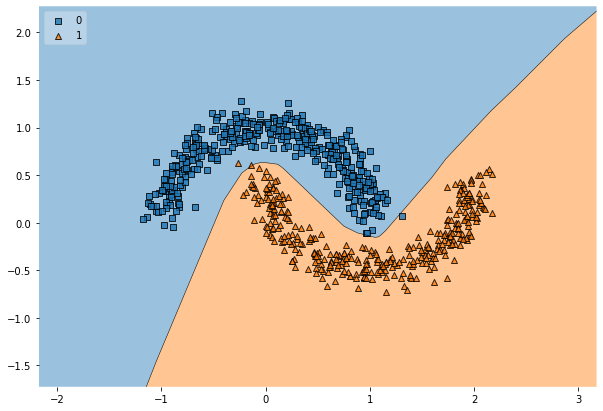

In [15]:
from mlxtend.plotting import plot_decision_regions as pdr

plt.figure(figsize=(10,7))

pdr(X_test.to_numpy(), y_test.ravel(), clf=model2, legend=2)

### Finding the best learning rate

In [16]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20))

In [17]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(4, activation='relu'),
                    tf.keras.layers.Dense(units=4, activation='relu'),
                    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer='Adam',
               metrics=['accuracy'])



history3 = model3.fit(X_train, y_train, epochs=200, callbacks=[obj, lr_scheduler])

Epoch 1/200
71/71 [==============================] - 1s 2ms/step - loss: 0.7005 - accuracy: 0.4889 - lr: 1.0000e-04
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.4907 - lr: 1.1220e-04
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.4956 - lr: 1.2589e-04
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.5058 - lr: 1.4125e-04
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.5182 - lr: 1.5849e-04
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.5178 - lr: 1.7783e-04
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.5329 - lr: 1.9953e-04
Epoch 8/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.5898 - lr: 2.2387e-04
Epoch 9/200
71/71 [==============================] - 0s 2ms/step - loss:

In [18]:
model3.evaluate(X_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9960


[0.026973815634846687, 0.9959999918937683]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


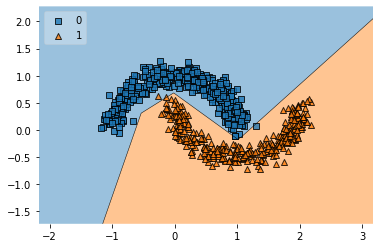

In [19]:
pdr(X_test.to_numpy(), y_test.ravel(), clf=model3, legend=2)

In [20]:
hist = pd.DataFrame(history3.history)
hist.head()

,loss,accuracy,lr
0,0.700460,0.488889,0.000100
1,0.687079,0.490667,0.000112
2,0.672661,0.495556,0.000126
3,0.657248,0.505778,0.000141
4,0.640941,0.518222,0.000158


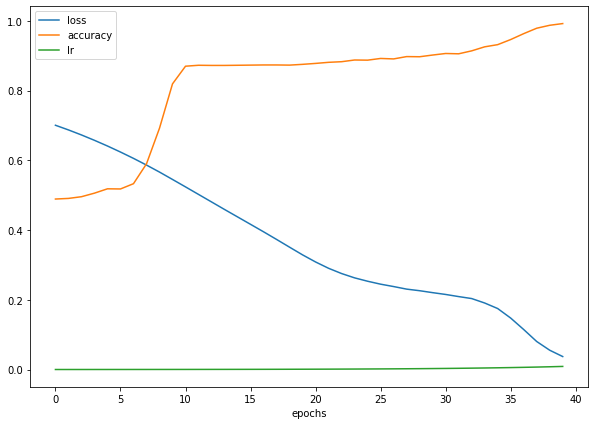

In [21]:

hist.plot(figsize=(10,7), xlabel='epochs')
# plt.xlabel(xlabel = 'epochs')

Text(0.5, 1.0, 'Loss vs Learning Rate')

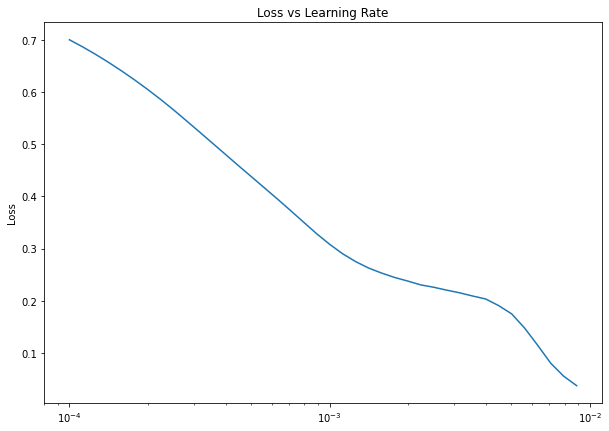

In [22]:
### Plotting learning rate vs loss to find the best possible learning rate

lrs = 1e-4 * (10 ** (tf.range(40)/20)) ##40 coz training ends at epoch 40
plt.figure(figsize=(10,7))
# plt.xlabel('Learning Rate')
plt.semilogx(lrs, history3.history['loss'])

plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')

***Usually the best learning rate is 10X times smaller than the lowest point on the curve which in our case is ((10^-2)/10)***

### Classification evaluation metrics

* Accuracy
* Precision - High Precision leads to low False Positives
* Recall - High Recall leads to low False Negatives
* F1- Score - Good overall classifiaction metric
* Confusion Matrix
* Classification Report (sklearn)

In [23]:
## Check the accuracy of model

loss, accuracy = model3.evaluate(X_test, y_test)
print('Model loss on test set: {}'.format(loss))
print('Model accuracy on test set: {:.2f}%'.format(accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9960
Model loss on test set: 0.026973815634846687
Model accuracy on test set: 99.60%


In [24]:
## Print all the other metrics

'''tf.round is used because sigmoid activation function produces the probability 
of a data point belonging to certain class so to change that probability we've 
used round function'''

from sklearn.metrics import classification_report

print(classification_report(y_test, tf.round(model3.predict(X_test).ravel())))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      0.99      1.00       349

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



### Confusion Matrix




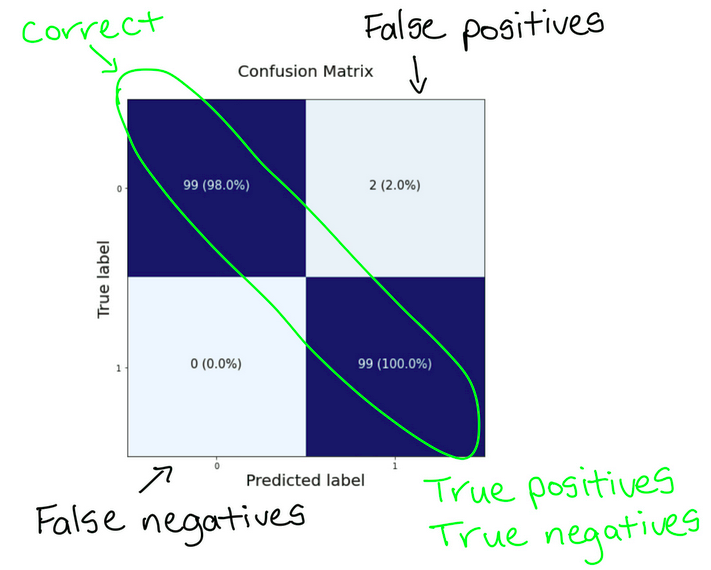

* True Positives - True Label is 1 and Predicted Label is 1

* True Negative - True Label is 0 and Predicted Label is 0

* False Positive - True label is 0 but Predicted label is 1

* False Negative - True label is 1 but Predicted label is 0

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb01187e50>)

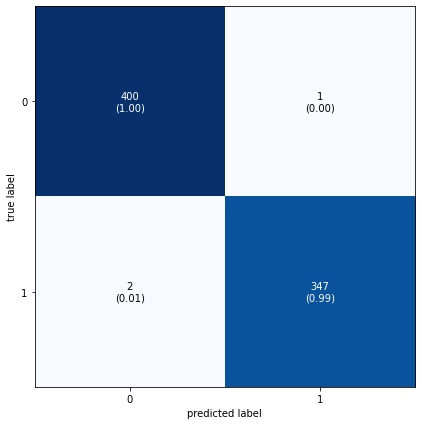

In [25]:
## Using mlxtend is better for easier visualization

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, tf.round(model3.predict(X_test)))
plot_confusion_matrix(cm, figsize=(10,7),
                      show_normed=True)

## Multi-Class Classification

For this we'll be using Fashion Mnist dataset with 60K training samples and 10K test samples

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [ ]:
print(train_data.shape, train_labels.shape)

Each entry is a 28x28 matrix and we have 60K such entries 

In [ ]:
import numpy as np


np.unique(train_labels)

We can see that there are 10 unique classes form 0-9

In [ ]:
plt.imshow(train_data[3])
sns.set_style()

In [30]:
# Create a list to store numeric class labels to regular language

# Index of elements shows its class
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

In [ ]:
# Plot an example image

index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title('{}-{}'.format(class_names[train_labels[index]], train_labels[index]),
          fontsize=16)

In [32]:
## Function to plot images to familiarize with the dataset
import random

def plot_images():
  plt.figure(figsize=(10,10))

  for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title('{}-{}'.format(class_names[train_labels[rand_index]],
                           train_labels[rand_index]), fontsize=16)
    plt.axis(False)

In [ ]:
plot_images()

### Building a multi class classification model

Architecture of NN

  * Input Shape = 28*28
  * Output Shape = 10
  * Loss Func = SparseCategoricalCrossentropy
  * Output Activation = Softmax

📝 - **If labels are one-hot encoded then use CategoricalCrossEntropy otherwise if it is in integer form like [0,3,2,1....] then use SparseCategoricalCrossentropy.**

In [38]:
## Create a model
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(units=32, activation='relu'),
                        tf.keras.layers.Dense(units=64, activation='relu'),
                        tf.keras.layers.Dense(units=10, 
                                    activation=tf.keras.activations.softmax)   
])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

non_norm_history = model4.fit(train_data, train_labels, epochs=100,
                              validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6023 - accuracy: 0.4635 - val_loss: 1.1160 - val_accuracy: 0.5538
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9950 - accuracy: 0.5977 - val_loss: 0.9773 - val_accuracy: 0.6208
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9487 - accuracy: 0.6156 - val_loss: 0.9236 - val_accuracy: 0.6089
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9283 - accuracy: 0.6229 - val_loss: 0.9581 - val_accuracy: 0.6172
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9015 - accuracy: 0.6264 - val_loss: 0.9004 - val_accuracy: 0.6277
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8765 - accuracy: 0.6321 - val_loss: 0.8829 - val_accuracy: 0.6293
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8781 - accuracy: 0.6323 - val_loss: 0.8976 - val_ac

In [41]:
## In the previous model we didn't normalize our data, so normalize the data to 
## see if there are any improvements

'''To normalize the data we divide it by he max value present in the dataset'''

print('Data range before normalization: ', train_data.min(), ',' , 
      train_data.max())

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

print('Data range after normalization: ', train_data_norm.min(), ',' ,
      train_data_norm.max())

Data range before normalization:  0 , 255
Data range after normalization:  0.0 , 1.0


In [43]:
##Using the same previous model again

model5 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(units=32, 
                                                    activation='relu'),
                              tf.keras.layers.Dense(units=64, 
                                                    activation='relu'),
                              tf.keras.layers.Dense(units=10,
                                                    activation='softmax')
])

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

norm_history = model5.fit(train_data_norm, train_labels,
                          epochs=100, 
                          validation_data=(test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5314 - accuracy: 0.8128 - val_loss: 0.4406 - val_accuracy: 0.8398
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3913 - accuracy: 0.8591 - val_loss: 0.4848 - val_accuracy: 0.8379
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3589 - accuracy: 0.8696 - val_loss: 0.3905 - val_accuracy: 0.8568
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8772 - val_loss: 0.3906 - val_accuracy: 0.8592
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3249 - accuracy: 0.8807 - val_loss: 0.3698 - val_accuracy: 0.8660
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.8848 - val_loss: 0.3986 - val_accuracy: 0.8524
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.8888 - val_loss: 0.3825 - val_ac


Normalized data works way better than the raw data. NNs tend to prefer normalized/scaled data.


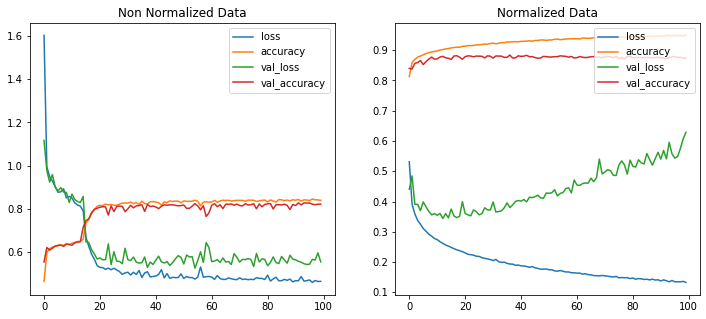

In [70]:
## Plotting non normalized vs normalized data
fig, axes = plt.subplots(1,2)
pd.DataFrame(non_norm_history.history).plot(ax=axes[0], figsize=(12,5), 
                                            title='Non Normalized Data')
pd.DataFrame(norm_history.history).plot(ax=axes[1], figsize=(12,5),
                                        title='Normalized Data',
                                        )
plt.legend(loc='upper right')